# **Lois s√©curitaires et criminalit√© en France**
---

<small>*Par Arthur Bidel, William Olivier et Anh Linh Piketty*</small>

<br>

## Introduction<a class="anchor" id="partie1"></a>

Le th√®me de l'ins√©curit√©, avec celui de l'ordre, occupent une place importante dans le d√©bat public et l'espace politique de ces derni√®res d√©cennies. Ancr√©e √† droite, la d√©nonciation d'une justice laxiste accompagne souvent la mise en exergue d'un "sentiment d'ins√©curit√©". Ce type de revendication repose sur plusieurs pr√©misses. D√©j√† de l'existence des ph√©nom√®nes d√©nonc√©s mais aussi d'un effet √† la baisse d'une l√©gislation plus stricte sur les ph√©nom√®nes d√©linquants. Dans quelle mesure ces postulats s'appuient sur un ancrage empirique concret ? 

Ce projet de programmation s'inscrit dans la continuit√© de ce d√©bat et tente (modestement) d'identifier l'effet de la production l√©gislative sur la criminalit√© et la d√©linquance en France. L'objet initial de notre curiosit√© √©tait de v√©rifier si un effet √† la baisse de la l√©gislation s√©curitaire sur les taux de criminalit√© et de d√©linquance  √©tait en effet constatable. Additionnellement, nous avons cherch√© √† dresser un portrait plus descriptif de l'√©volution de ces ph√©nom√®nes sur les 20 derni√®res ann√©es ainsi que de la l√©gislation associ√©e.

Les chiffres r√©pertoriant les nombres de crimes et d√©lit en France sont aujourd'hui disponible sur d'assez large et p√©riode et permettent, bien qu'imparfaitement de documenter les diff√©rents aspects et √©volutions de la criminalit√© dans l'hexagone. De m√™me, la production l√©gislative est rendue disponible au public permettant de constater son √©volution quantitativement et qualitativement. Nous approchons les textes de lois sous un angle plut√¥t quantitatif ici ce qui ne permet pas de mesurer une augmentation de la s√©v√©rit√© des textes par exemple, des approches NLP pourrait √™tre int√©ressantes √† d√©velopper pour approfondir cet angle de recherche. 

*NB1 : Les fonctions de visualisation ont √©t√© d√©plac√©es dans un script python (***visualisation.py***) pour plus de lisibilit√©*<br>
*NB2 : Le travail de r√©cup√©ration et de mise en forme des donn√©es a √©t√© assez long pour les deux bases de donn√©es (sur les infractions et la l√©gislation) et deux autres notebooks leur sont consacr√©s. Le sommaire cliquable renvoie vers ces notebooks pour chacune des parties correspondantes*

## Sommaire

* [Introduction](#partie1)
* [Installation](#partie2)
* [R√©cuparation et description des donn√©es](#partie3)
    * Base d√©linquance [(voir le notebook *database_d√©linquance*)](database_d√©linquance.ipynb)
    * Base l√©gifrance [(voir le notebook *database_l√©gifrance*)](database_l√©gifrance.ipynb)
* [Analyse exploratoire](#partie4)
    * [Portrait de la d√©linquance en France](#partie41)
        * [Description et visualisation](#partie411)
        * [Cartographie](#partie412)
    * [La l√©gislation s√©curitaire en France](#partie42)
        * [Statistiques descriptives](#partie421)
* [Mod√©lisation](#partie5)
    * [Fusion des bases de donn√©es](#partie51)
    * [R√©gression de tel indicateur de criminalit√© sur la production l√©gislative](#partie52)
        * [Simple ?????]()
        * [Panel ?????]()
    * [D√©calage temporel ?????]()
* [Conclusion et perspectives](#partie6)

## Installation<a class="anchor" id="partie2"></a>

In [1]:
!pip install -r requirements.txt

In [2]:
# Biblioth√®ques standard
import os, requests, zipfile

# Data science et manipulation de donn√©es
import pandas as pd, numpy as np, geopandas as gpd

# Acc√®s S3
import s3fs


# Fonctions et styles personnalis√©s import√©s de visualisation.py
from visualisation import (
    charte_graphique,
    charte_graphique2,
    charte_graphique3,
    dictionnaire_geo,
    tracer_evolution_taux,
    tracer_evolution_taux_relatif_lisse,
    boxplot_indicateur_par_saison,
    evolution_indicateur_animation,
    animer_evolution_densite,
    evolution_idf_animation,
    get_increase,
    tri_occurrence,
    plot_histogram,
    camembert,
    all,
    keywords,
    filter_keyword,
    keywords_occ,
    √©volution_indicateur,
    √©volution_indicateur,
)

## R√©cuparation et description des donn√©es<a class="anchor" id="partie3"></a>

Les tableaux de donn√©es con√ßus au d√©but de notre travail, dans les deux notebooks consacr√©s, ont tous les deux √©t√© stock√©s sur S3 et on les r√©cup√®re pr√™ts √† l'usage dans cette partie. Les parties de r√©cup√©ration et nettoyage des donn√©es sont donc optionnelles √† la lecture mais offrent n√©anmoins des √©clairages m√©thodologiques quant √† la construction des indicateurs et des variables utilis√©es dans ce travail (lisez les svp...).

In [3]:
# Information d'acc√®s au cloud MinIO (Bucket de Anh Linh)
fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})
MY_BUCKET = "anhlinh"

In [ ]:
# V√©rification du contenu (on doit retrouver dedans df_indicateurs_dep.csv, df_indicateurs_nat.csv et df_loda.csv)
fs.ls(f"{MY_BUCKET}/diffusion")

['anhlinh/diffusion/.keep',
 'anhlinh/diffusion/df_indicateurs_dep.csv',
 'anhlinh/diffusion/df_indicateurs_nat.csv',
 'anhlinh/diffusion/df_loda.csv']

* #### Tableaux de donn√©es concernant la criminalit√© : 

In [7]:
# R√©cup√©ration du tableau d√©partemental d'indicateur de criminalit√©
FILE_PATH_S3_DEP = f"{MY_BUCKET}/diffusion/df_indicateurs_dep.csv"
with fs.open(FILE_PATH_S3_DEP, "rb") as file_in_dep:
    df_indicateurs_dep = pd.read_csv(file_in_dep)

# V√©rification
df_indicateurs_dep.head()

Unnamed: 0  Ann√©e D√©partement Indicateur  Nombre  Population  \
0           0   1996          01  Homicides    17.0      499310   
1           1   1996          02  Homicides    14.0      538017   
2           2   1996          03  Homicides    11.0      349376   
3           3   1996          04  Homicides     6.0      137453   
4           4   1996          05  Homicides     5.0      118526   

   Taux (/10 000)          Nom D√©partement  Superficie (km2)    Densit√©  
0        0.340470                      Ain              5762  86.655675  
1        0.260215                    Aisne              7362  73.080277  
2        0.314847                   Allier              7340  47.598910  
3        0.436513  Alpes-de-Haute-Provence              6925  19.848809  
4        0.421848             Hautes-Alpes              5549  21.359885

In [ ]:
# R√©cup√©ration du tableau national d'indicateur de criminalit√©
FILE_PATH_S3_NAT = f"{MY_BUCKET}/diffusion/df_indicateurs_nat.csv"
with fs.open(FILE_PATH_S3_NAT, "rb") as file_in_nat:
    df_indicateurs_nat = pd.read_csv(file_in_nat)

# V√©rification
df_indicateurs_nat.head()

Unnamed: 0        Date          Zone                      Indicateur  \
0           0  1996-01-01  France_M√©tro  Coups et blessures volontaires   
1           1  1996-02-01  France_M√©tro  Coups et blessures volontaires   
2           2  1996-03-01  France_M√©tro  Coups et blessures volontaires   
3           3  1996-04-01  France_M√©tro  Coups et blessures volontaires   
4           4  1996-05-01  France_M√©tro  Coups et blessures volontaires   

   Nombre  Population  Taux (/10 000)  Ann√©e  Mois     Saison  Taux relatif  \
0  5616.0       57936        0.969345   1996     1      Hiver      1.000000   
1  6115.0       57943        1.055347   1996     2      Hiver      1.088722   
2  6668.0       57951        1.150627   1996     3  Printemps      1.187015   
3  6800.0       57963        1.173162   1996     4  Printemps      1.210262   
4  7415.0       57976        1.278978   1996     5  Printemps      1.319424   

   Taux de pauvret√© (%)  
0                  19.3  
1                  19.3  
2                  19.3  
3                  19.3  
4                  19.3

Pour ce qui est de la d√©linquance, nous disposons de deux tableaux de donn√©es, un √† l'√©chelle d√©partementale et un √† l'√©chelle nationale. On trouve dans chacun d'entre eux huit indicateurs de criminalit√© et de d√©linquance construit selon la m√©thodologie actuelle du minist√®re de l'int√©rieur. Les huits indicateurs sont les : *homicides*, *tentatives d'homicides*, *coups et blessures volontaires*, *vols avec violence*, *vols sans violence*, *escroqueries*, *violences sexuelles* et *infractions li√©es √† la consommation ou la vente de stup√©fiants*.

Nous avons utilis√© les nombres brut d'infractions recens√©es par les forces de l'ordre, par types (107 diff√©rents), entre 1996 et 2022, mis √† disposition en open data par le minist√®re de l'int√©rieur ainsi que les estimations de population de l'INSEE pour obtenir les taux de d√©linquance (d√©finit comme le rapport du nombre de d√©lit/crime sur la population) associ√©s √† chacun des indicateurs.

Nous avons √©galement d√©j√† ajout√© √† ces bases les variables qui nous serviront de contr√¥le dans la partie mod√©lisation de ce travail. A savoir la densit√© pour la base d√©partementale et le taux de pauvret√© pour la base nationale. La densit√© sert ici de proxy √† la densit√© urbaine qui pourrait √† la fois √™tre un facteur criminog√®ne et un handicap pour le maintien de l'ordre. Elle a √©t√© d√©termin√©e gr√¢ce aux estimations de population d√©j√† mentionn√©es et aux superficie des d√©partements scrap√©es de Wikip√©dia. Le taux de pauvret√© a √©t√© obtenue via l'INSEE mais malheureusement nous n'avons pas trouv√© de donn√©es √† l'√©chelle d√©partementale pour toutes les ann√©es couvertes par nos bases.

La plupart de nos sources comportaient des donn√©es manquantes pour les territoires d'Outre-Mer et nous avons donc d√©cid√© de centrer notre travail sur la France m√©tropolitaine. De m√™me il n'√©tait pas possible d'obtenir des donn√©es √† granularit√© mensuelle pour les donn√©es d√©partementales et on s'est donc satisfait d'une granularit√© annuelle. 

Vous pouvez trouvez plus de pr√©cision sur la construction de ces tables dans le notebook consacr√© ([juste l√† !](database_d√©linquance.ipynb)).

* #### Tableaux de donn√©es concernant la production l√©gislative : 

In [5]:
# R√©cup√©ration de la base de donn√©es l√©gislative
FILE_PATH_S3_LODA = f"{MY_BUCKET}/diffusion/df_loda.csv"
with fs.open(FILE_PATH_S3_LODA, "rb") as file_in_loda:
    df_loda = pd.read_csv(file_in_loda)

# V√©rification
df_loda.head()

Unnamed: 0                                              Titre  \
0           0  Arr√™t√© du 31 d√©cembre 2008 relatif aux modalit...   
1           1  Arr√™t√© du 31 d√©cembre 2008 portant cr√©ation d'...   
2           2  D√©cret n¬∞ 2008-1549 du 31 d√©cembre 2008 portan...   
3           3  Arr√™t√© du 31 d√©cembre 2008 relatif aux modalit...   
4           4  Arr√™t√© du 31 d√©cembre 2008 relatif aux modalit...   

                                ID        Date  Nature     Etat Origine  \
0  LEGITEXT000020083722_27-05-2024  2008-12-31  ARRETE  VIGUEUR    LEGI   
1  LEGITEXT000020167092_30-01-2009  2008-12-31  ARRETE  VIGUEUR    LEGI   
2  LEGITEXT000020080924_02-01-2009  2008-12-31  DECRET  VIGUEUR    LEGI   
3  LEGITEXT000020083722_18-12-2015  2008-12-31  ARRETE  VIGUEUR    LEGI   
4  LEGITEXT000049943833_01-10-2024  2008-12-31  ARRETE  VIGUEUR    LEGI   

               Date Publication  Ann√©e  Mois  
0  2009-01-01T00:00:00.000+0000   2009     1  
1  2009-01-29T00:00:00.000+0000   2009     1  
2  2009-01-01T00:00:00.000+0000   2009     1  
3  2009-01-01T00:00:00.000+0000   2009     1  
4  2009-01-01T00:00:00.000+0000   2009     1

En ce qui concerne la production l√©gislative, notre DataFrame principal recense le nombre de textes publi√©s chaque mois, class√©s par type (Lois, Arr√™t√©s, Ordonnances, D√©crets et D√©cisions) de 2006 √† 2022. Ces donn√©es proviennent du fonds LODA via l'API d√©livr√©e par L√©gifrance. 

Cependant, les donn√©es ne sont pas exhaustives (et par cons√©quent non repr√©sentatives de l‚Äôensemble de l‚Äôactivit√© l√©gislative) puisqu'elles ne refl√®tent pas les modifications l√©gislatives plus subtiles, telles que l‚Äôalourdissement des peines, la modification d‚Äôarticles existants ou l‚Äôajout de pr√©cisions juridiques (requalification d‚Äôune infraction mineure en d√©lit par exemple) qui peuvent avoir un impact significatif sans pour autant g√©n√©rer de nouveaux textes.

Ces donn√©es offrent, n√©anmoins, un aper√ßu des th√©matiques trait√©es depuis 2006, mettant en √©vidence la fr√©quence de publication des textes l√©gislatifs. Cette base de donn√©es nous donnent acc√®s au nombre d‚Äôoccurrences de chaque cat√©gorie de texte sans refl√©ter leur port√©e ou leur impact r√©el. Par exemple, une loi largement d√©battue appara√Æt de la m√™me mani√®re qu‚Äôun arr√™t√© technique de moindre envergure.

Cette absence de mesure du degr√© d‚Äôimportance ou des modifications souligne les limites de cette √©tude : l'analyse reste quantitative et des approches en NLP pourrait enrichir la d√©marche en permettant d'√©valuer la s√©v√©rit√© des textes adopt√©s par exemple. 

De m√™me vous pouvez, pour plus de d√©tails, consulter le notebook consacr√© ([ici](database_l√©gifrance.ipynb)).

## Analyse exploratoire<a class="anchor" id="partie4"></a>

### Portrait de la d√©linquance en France<a class="anchor" id="partie41"></a>

#### Description et visualisation<a class="anchor" id="partie411"></a>

Etudions d'abord l'√©volution de chacun de nos indicateurs sur la p√©riode de donn√©es disponible (1996 √† 2022).

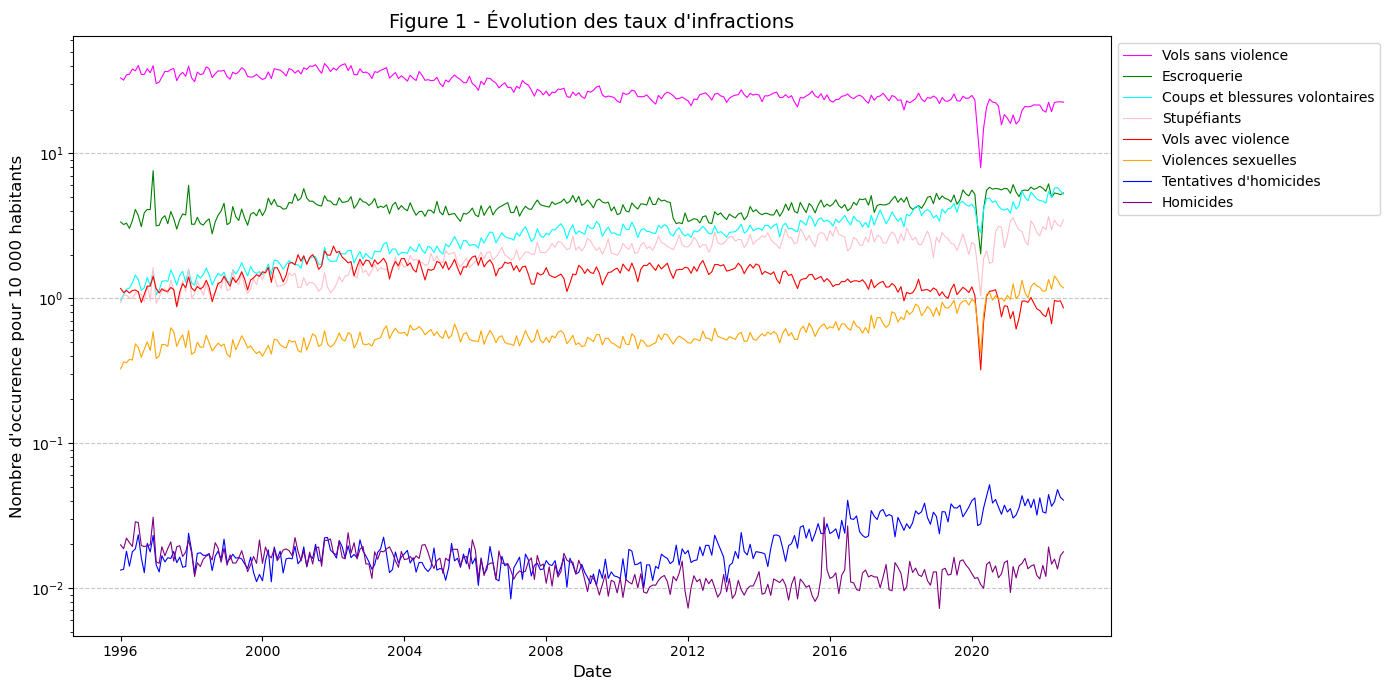

In [8]:
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux (/10 000)", use_log_scale = True, title="Figure 1 - √âvolution des taux d'infractions")

M√™me si l'√©chelle logarithmique √©crase un peu les √©volutions de long terme, la Figure 1 permet d'illustrer les √©volutions des nombres d'infractions pour 10 000 habitants pour chacun de nos indicateurs. On remarque d'ores et d√©j√† des √©volutions contrast√©es. Certains types d'infractions sont plut√¥t √† la baisse (homicides, vols de tout types) quand d'autres augmentent (tentatives d'homicides, coups et blessures volontaires, escroqueries).

De mani√®re g√©n√©rale, les taux d‚Äôinfraction ne pr√©sentent pas de variations brutales au fil du temps : ils suivent une tendance relativement stable √† part les homicides et les tentatives d'homicides qui repartent √† la hausse depuis la derni√®res d√©cennies (m√™me si les homicides sont toujours moins fr√©quents en 2022 qu'en 1996).

En normalisant tous les taux √† leur valeur en 1996, les Figures 2 et 3 permettent de visualiser l‚Äô√©volution relative de chaque type d‚Äôinfraction par rapport √† cette ann√©e de r√©f√©rence. En particulier, la Figure 3 pr√©sente les courbes liss√©e des tendances gr√¢ce √† l‚Äôapplication d‚Äôun filtre de Savitzky-Golay. Ce filtre est con√ßu pour lisser les s√©ries temporelles en ajustant des polyn√¥mes locaux √† travers une fen√™tre glissante, ce qui permet d'√©liminer le "bruit" statistique.

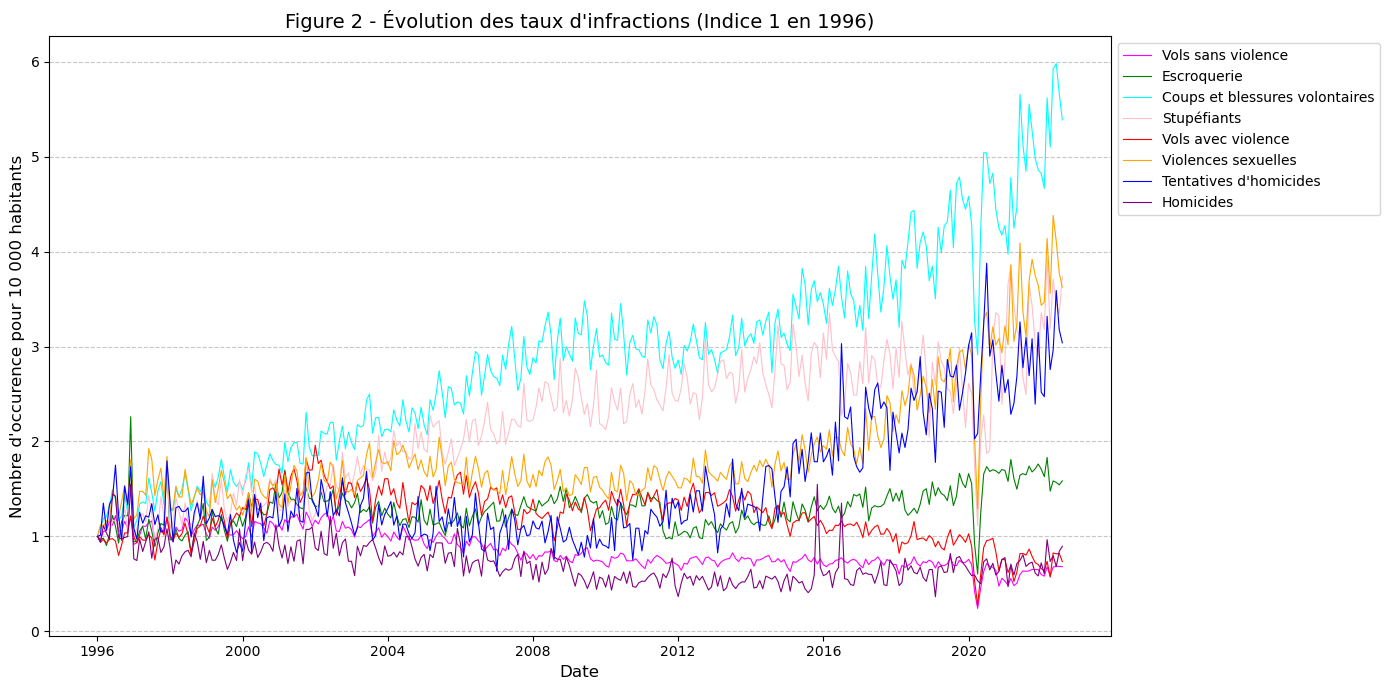

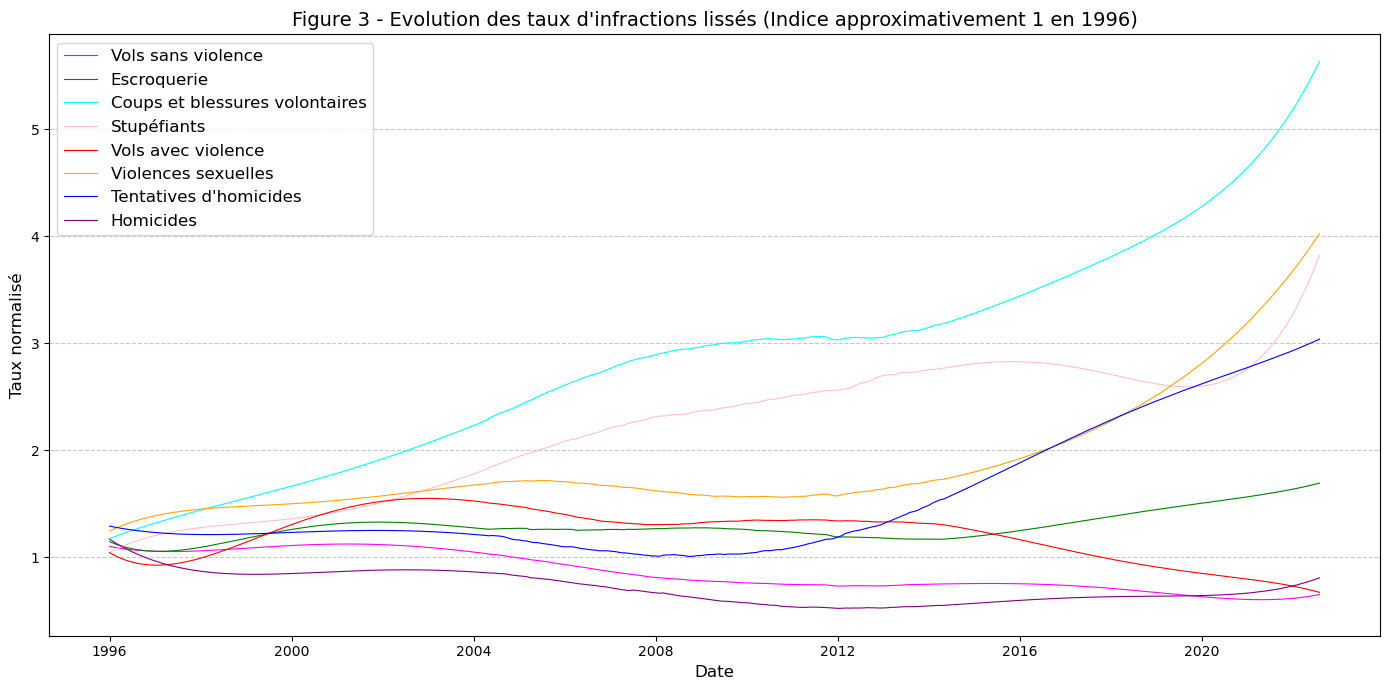

 Homicides entre 1996-01-01 et 2022-08-01: -10.47858905472778 %
 Tentatives d'homicides entre 1996-01-01 et 2022-08-01: 203.96935961992378 %
 Vols avec violence entre 1996-01-01 et 2022-08-01: -26.53294218387946 %
 Vols sans violence entre 1996-01-01 et 2022-08-01: -31.904976615785706 %
 Escroquerie entre 1996-01-01 et 2022-08-01: 58.49635036177963 %
 Coups et blessures volontaires entre 1996-01-01 et 2022-08-01: 438.69498681855345 %
 Violences sexuelles entre 1996-01-01 et 2022-08-01: 262.6825902105622 %
 Stup√©fiants entre 1996-01-01 et 2022-08-01: 273.78697439863026 %


In [9]:
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux relatif", title="Figure 2 - √âvolution des taux d'infractions (Indice 1 en 1996)")
tracer_evolution_taux_relatif_lisse(df_indicateurs_nat, charte_graphique, title="Figure 3 - Evolution des taux d'infractions liss√©s (Indice approximativement 1 en 1996)")

liste = ['Homicides', "Tentatives d'homicides", 'Vols avec violence', 'Vols sans violence', 'Escroquerie', 'Coups et blessures volontaires', 'Violences sexuelles', 'Stup√©fiants']
for indicateur in liste : 
    get_increase(df_indicateurs_nat, indicateur=indicateur, date1='1996-01-01', date2='2022-08-01')

In [10]:
get_increase(df_indicateurs_nat, indicateur='Violences sexuelles', date1='1996-01-01', date2='2007-01-01')
get_increase(df_indicateurs_nat, indicateur='Violences sexuelles', date1='2007-01-01', date2='2022-08-01')

 Violences sexuelles entre 1996-01-01 et 2007-01-01: 48.36255085018586 %
 Violences sexuelles entre 2007-01-01 et 2022-08-01: 144.45696581261487 %


A nouveau, on constate des tendances contrast√©es ce qui traduit une transformation des ph√©nom√®nes d√©linquants. Les menages seraient moins souvent confront√©s √† des vols de tout types mais plus souvent √† des escroqueries ce qui coincide avec les enqu√™tes de victimation. Plus g√©n√©ralement, les homicides et vols sont √† la baisse alors que le reste des indicateurs augmentent (plus ou moins). On constate par exemple que les coups et blessures volontaires ont plus que quadrupl√©es (augmentation de 438%). Les violences sexuelles augmentent elles-aussi significativement sur la p√©riode puisqu'elles font plus que doubler. Dans un contexte de lib√©ration de la parole et d‚Äôincitation √† d√©poser plainte, notamment √† travers l‚Äôam√©lioration (toute relative) des conditions d‚Äôaccueil des victimes, les personnes d√©clarent plus fr√©quemment avoir subi des violences sexuelles et d√©posent plus souvent plainte. Cette augmentation ne concorde en revanche pas avec les r√©sultats des enqu√™tes de victimation qui restent plut√¥t stable. Il est par ailleurs int√©ressant de constater que l'augmentation des violences sexuelles d√©clar√©es est beaucoup plus accrue dans la deuxi√®me moiti√© de la p√©riode (qui correspond √† la p√©riode d'existence du mouvement Me Too).

Enfin, la Figure 4, quant √† elle, zoome sur une p√©riode sp√©cifique : celle de la pand√©mie de COVID-19.

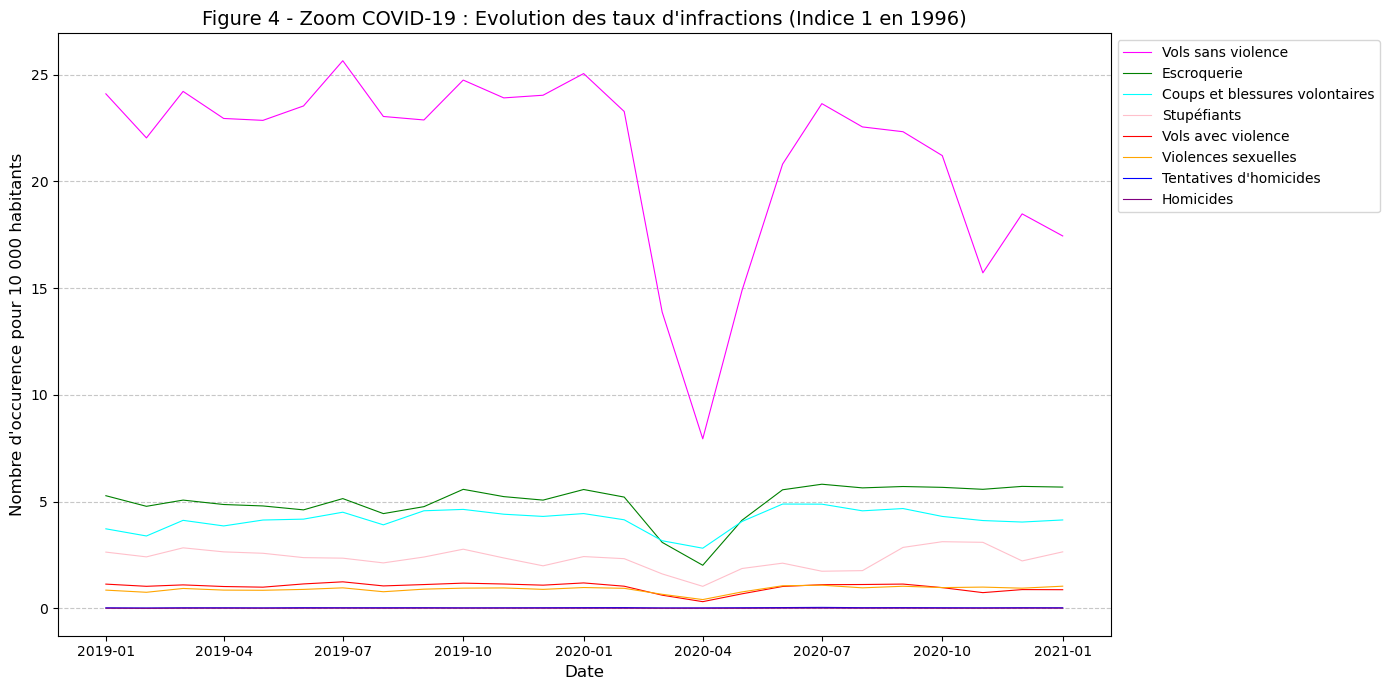

In [11]:
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, title="Figure 4 - Zoom COVID-19 : Evolution des taux d'infractions (Indice 1 en 1996)", use_log_scale=False, time_period=["2019-01-01", "2021-01-01"])

Cette p√©riode est marqu√©e par une chute significative de presque tous les indicateurs, avec un creux particuli√®rement notable en avril 2020, correspondant aux mesures de confinement les plus strictes. Seuls les homicides semblent relativement √©pargn√©es par cette baisse, ce qui pourrait s'expliquer par la nature moins opportuniste de ce type de crime (donc moins influenc√© par les restrictions de mobilit√©). L'activit√© criminelle a ainsi √©t√© largement perturb√©e par les restrictions de d√©placement, la fermeture des commerces, l'augmentation de la surveillance, etc.

D'autres tendance globale de l'activit√© criminelle se remarques dans nos donn√©es, notamment une certaine saisonnalit√©.

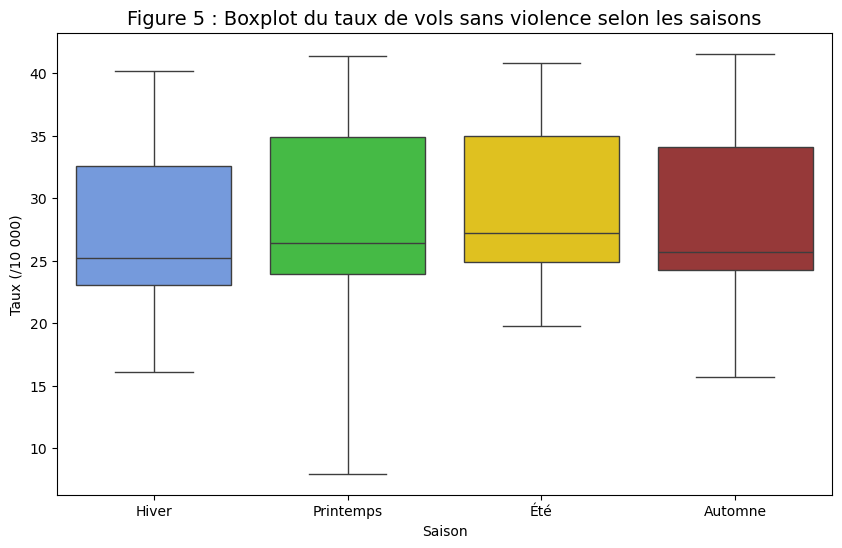

In [12]:
boxplot_indicateur_par_saison(df_indicateurs_nat, "Vols sans violence", title="Figure 5 : Boxplot du taux de vols sans violence selon les saisons")

La Figure 6 n'illustre que le cas des vols sans violences, mais en affichant les autres boxplot, une tendance g√©n√©rale √† un taux d'infractions plus √©lev√© en √©t√© appara√Æt pour tous les indicateurs.

#### Cartographie<a class="anchor" id="partie412"></a>

Pour finir, nous une repr√©sentation plus visuelle de ces √©volutions avec des cartes anim√©es. Il est int√©ressant de constater que si, pour certains indicateurs certaines concentrations g√©ographiques restent constantes autour du temps (autour de l'Ile de France et de la c√¥t√© d'Azur souvent), ces ph√©nom√®ne de concentratons n'existent pas pour les homicides ou les violences sexuelles qui semblent beaucoup plus uniform√©ment r√©partis sur le territoire.

*NB3 : On s'est rendu compte que les animations ne s'affichaient pas dans le notebook sur GitHub, elles sont donc sauvegard√©es dans le dossier ***animations*** pour √™tre visualis√©e au besoin.*

In [ ]:
for indicateur in liste :
    evolution_indicateur_animation(df_indicateurs_dep, indicateur)   

En parall√®le de ces √©volutions assez substantielles de nos indicateurs de criminalit√©, on a cherch√© √† observer si la densit√© √©voluait particuli√®rement sur la p√©riode. En pratique l'√©chelle du d√©partement est probablement trop large pour rendre compte de ces √©volutions (les campagnes "noient" les √©volutions qui sont surtout urbaines). Concr√®tement, la carte anim√©e est plut√¥t tr√®s statique: √©tant donn√© que l'√©chelle est adapt√©e √† la densit√© minimale et maximale des d√©partements, la densit√© exceptionnellement √©lev√©e de Paris tend √† √©craser les variations observ√©es dans les autres d√©partements.

Plus g√©n√©ralement, en consultant la litt√©rature associ√©e, il semble que l'inclusion de crit√®re g√©ographique dans l'√©tude de la criminalit√© pose souvent ce type de probl√®me puisque l'√©chelle d√©partementale est souvent inadapt√©e √† l'√©chelle √† laquelle ont √©tudie souvent les organisations spatiales.

In [14]:
animer_evolution_densite(df=df_indicateurs_dep, colonne_densite='Densit√©')

KeyboardInterrupt: 

Si on est tr√®s attentif, on voit que l'essentiel des variations se fait au niveau de l'Ile de France, on a donc propos√© un zoom au niveau de cette zone g√©ographique, qui r√©sume en pratique quasi la totalit√© des variations de densit√© visible √† cette √©chelle.

In [ ]:
evolution_idf_animation(df_indicateurs_dep, 'Densit√©')

### La l√©gislation s√©curitaire en France<a class="anchor" id="partie42"></a>

#### Statistiques descriptives<a class="anchor" id="partie421"></a>

On cherche, pour cette base de donn√©es, √† observer les diff√©rents types de textes promulgu√©s et leur part respective. Cette analyse est pr√©sent√©e d'abord pour l'ensemble des ann√©es (Figure 6), puis d√©compos√©e au fil du temps (figures suivantes), permettant ainsi de suivre l'√©volution des publications.

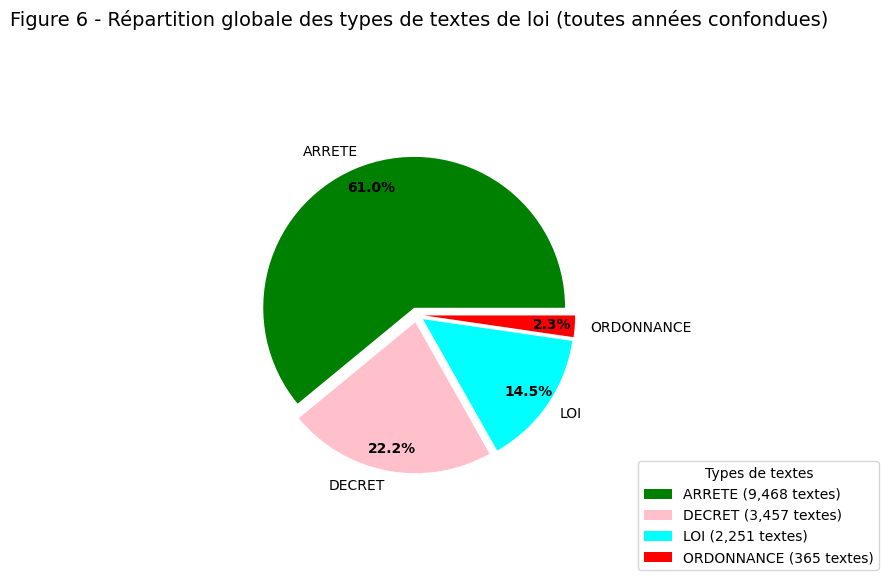

In [16]:
camembert(df_loda)

La base de donn√©es obtenue via l'API est √† l'√©tat brute, c'est-√†-dire que chaque ligne correspond √† une observation : chaque ligne repr√©sente, en effet, un texte individuel avec les informations sur sa publication.

Afin de produire une visualisation temporelle de ces donn√©es, nous avons r√©organiser ces donn√©es pour obtenir un tableau agr√©g√© qui montre, pour chaque mois, chaque ann√©e et chaque type de texte, le nombre de ce type texte de loi promulgu√©s en fonction de sa nature (loi, d√©cret, arr√™t√©, ordonnance). C'est le r√¥le de la fonction tri_occurrence, en agr√©geant les observations par mois et par nature. 

La ligne de code ci-dessous permet de mieux comprendre l'id√©e g√©n√©rale du tableau obtenu gr√¢ce √† la fonction tri_occurrence appliqu√©e au dataframe df_loda initial.

In [17]:
tri_occurrence(df_loda).head(10)

year  month  day       Date  Indicateur  Nombre  Cumulatif
0  1996      1    1 1996-01-01       Texte     1.0        1.0
1  1996      1    1 1996-01-01      Arrete     1.0        1.0
2  1996      1    1 1996-01-01  Ordonnance     0.0        0.0
3  1996      1    1 1996-01-01         Loi     0.0        0.0
4  1996      1    1 1996-01-01      Decret     0.0        0.0
5  1996      2    1 1996-02-01  Ordonnance     0.0        0.0
6  1996      2    1 1996-02-01      Arrete     3.0        4.0
7  1996      2    1 1996-02-01         Loi     1.0        1.0
8  1996      2    1 1996-02-01       Texte     9.0       10.0
9  1996      2    1 1996-02-01      Decret     5.0        5.0

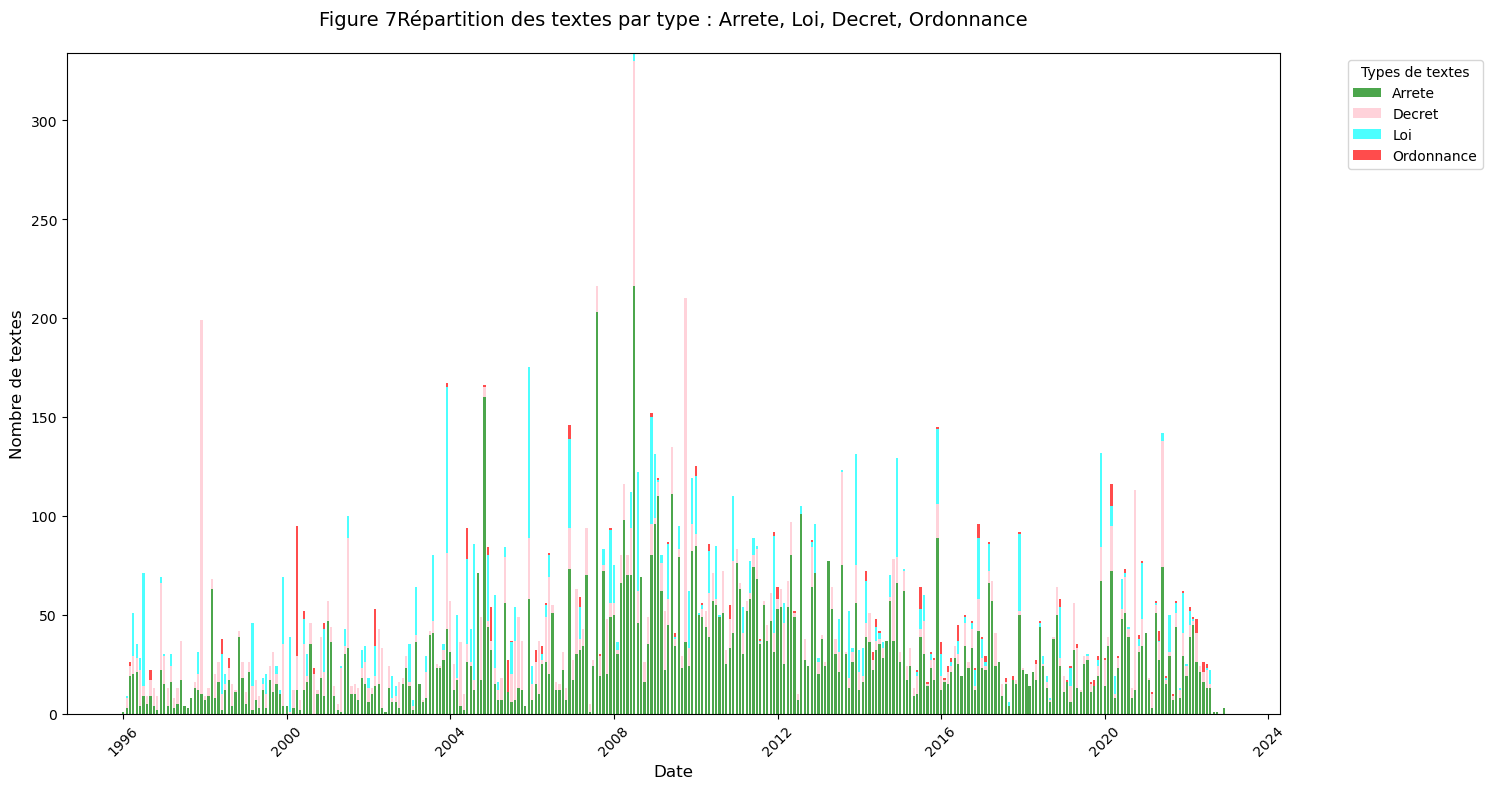

In [18]:
all = ["Arrete", "Loi", "Decret", "Ordonnance"]

plot_histogram(tri_occurrence(df_loda), all, numero_figure ='Figure 7')

Ce diagramme en barre montre le nombre de textes l√©gislatifs publi√©s de 1996 √† 2022. Globalement, on observe une tendance progressive √† la hausse de 1996 √† 2009 du nombre de publications au cours du temps, jusqu'√† atteindre un pic de plus de 300 textes en 2009, puis une l√©g√®re tendance √† la baisse jusqu'en 2020. Les arr√™t√©s (barres vertes) sont la premi√®re cat√©gorie la plus fr√©quente et constituent la majeure partie de l'activit√© l√©gislative, en particulier √† partir de 2006. Les lois (bleu clair), d√©crets (rose p√¢le) et ordonnances (rouge) sont moins nombreux, mais r√©guliers et leur volume reste significatif pour l'analyse. Les ordonnances (rouge) sont bien plus rares pendant toute la p√©riode √©tudi√©e.

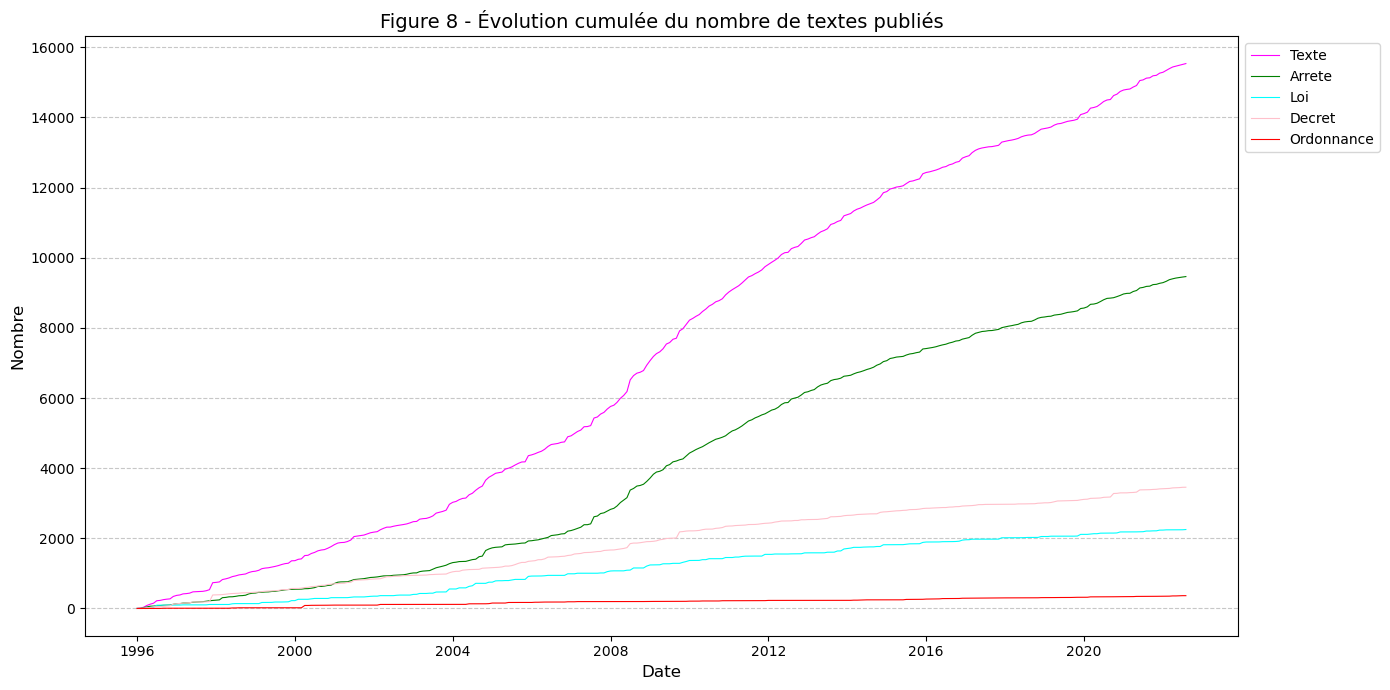

In [19]:
tracer_evolution_taux(tri_occurrence(df_loda), charte_graphique3, taux = "Cumulatif", title="Figure 8 - √âvolution cumul√©e du nombre de textes publi√©s", xlabel = "Date",ylabel = "Nombre", time_period = ["1996-01-01", "2022-08-31"])

Cette figure pr√©sente l‚Äô√©volution cumul√©e des textes publi√©s au fil du temps et donc permet de visualiser plus clairement la croissance globale de la production l√©gislative depuis 1996. La courbe rose (Texte) illustre bien la tendance pr√©c√©demment mentionn√©e plut√¥t d√©croissante depuis 2009 avec une courbe d'abord lin√©aire voire concave et convexe ensuite. Elle atteint plus de 15 000 textes en 2022 dont les arr√™t√©s (vert) constituent presque 10 000 publications. Les lois, d√©crets et ordonnances s‚Äôaccumulent plus lentement, avec une progression presque lin√©aire.

'''Les mots revenants le plus souvent sont ceux dont la fr√©quence (seuil choisit arbitrairement), est au dessus de 10.'''

In [33]:
# plot_histogram(tri_occurrence(filter_rows_with_keyword(df_loda, 'vol')), all)

## Mod√©lisation<a class="anchor" id="partie5"></a>

Dans nos deux parties de statistiques descriptives, on a d√©gag√© des saisonnalit√© annuelle. Pour la mod√©lisation √©conom√©trique, on d√©cide d'indicer temporellement nos donn√©es par les ann√©es pour √©viter que ces probl√®mes de saisonnalit√© impacte trop l'ind√©pendance des diff√©rentes observations utilis√©es.

Nous avons choisi de recentrer notre analyse sur les vols sans violence, d'une part car cet indicateur pr√©sente des variations marqu√©es, avec un plus grand nombre d'observations, et d'autre part car le mot vol revient le plus fr√©quemment dans les titres de publication. Par cons√©quent, nous allons √©galement focaliser notre attention sur la production l√©gislative li√©e aux vols, en excluant les textes qui ne rel√®vent pas de cette th√©matique. Pour ce faire, nous allons rechercher des mots-cl√©s appartenant √† ce champ lexical dans les titres des publications, afin de les croiser ult√©rieurement avec nos donn√©es de criminalit√©.

In [6]:
keywords_occ(df_loda, keywords)

{'d√©linquance': 35,
 'crime': 49,
 'd√©lit': 8,
 'Homicide': 0,
 'Vol': 231,
 'Stup√©fiant': 158,
 'Escroquerie': 3,
 'Contrefa√ßon': 8,
 'Sequestration': 0,
 'Recel': 0,
 'Prox√©n√©tisme': 1,
 'Menace': 63,
 'Cambriolage': 0,
 'infraction': 218,
 'Attentat': 4,
 'd√©gradation': 18,
 'Outrage': 1}

On remarque effectivement que le terme vol revient le plus, suivi par infraction dans les titres des publications l√©gislatives. 

### Fusion des bases de donn√©es<a class="anchor" id="partie51"></a>

### R√©gression(s ?)<a class="anchor" id="partie51"></a>

<span style="color:red;">**la faire, here des indicatiosn tir√©es de chat et de vergara-merino**</span>


Explication de en gros ce que j'ai compris de chatgpt et vergara-merino

On peut faire une regr√©ssion de panel de la forme : <br>
$$
Y_{it} = \alpha + \beta \cdot L_t + \gamma \cdot G_{it}+ \mu _i + \epsilon _{it}
$$

o√π : <br>
$Y_{it}$ : Taux de criminalit√© (pour notre indicateur pr√©f√©r√© qu'on choisirat j'imagine) di d√©partement i √† l'ann√©e t<br>
$L_t$ : Mesure de l'intensit√© l√©gislative, comme on a pas les arr√™t√©s pr√©fectoraux sur l√©gifrance on est oblig√© d'en faire une variable constante pour tous les d√©partements i, elle est donc seulement indic√©e par t (les diff√©rences entre departement viennent donc des variables de contr√¥les √† priori)<br>
$G_{it}$ : Variable de contr√¥le : pour la table d√©partementale c'est la densit√© (en vrai l'√©chelle d√©partementale est pas hyper appropri√©e pour l'utiliser comme contr√¥l√© mais bon)<br>
$\mu _i$ : effet fixe aux d√©partements (pour diff√©rences structurelles non observ√©es)<br>
$\epsilon _{it}$ : error term<br>


Regression simple aussi : <br>
$$
Y_t = \alpha + \beta \cdot L_t + \gamma \cdot G_t + \epsilon _t
$$

o√π : <br>
$Y_t$ : Taux de criminalit√© (pour notre indicateur pr√©f√©r√© qu'on choisirat j'imagine)  √† l'ann√©e t<br>
$L_t$ : Mesure de l'intensit√© l√©gislative<br>
$G_t$ : Variable de contr√¥le : pour la table nationale, le taux de pauvret√©<br>
$\epsilon _t$ : error term<br>


Compl√©ment chatgpt sur les deux trucs, pas ex√©cuter ces lignes de code, lui demander pour further details

In [ ]:
break

In [ ]:
 Mise en Place du Code pour regression de panel:
Biblioth√®que Python : Utilise statsmodels ou linearmodels pour estimer les r√©gressions de panel.
Exemple de Code :

from linearmodels.panel import PanelOLS
import pandas as pd

# Chargement des donn√©es en format panel
data = pd.read_csv("data_panel.csv")  # Assure-toi que le dataset est au format long
data = data.set_index(['department', 'year'])

# Mod√®le √† Effets Fixes
model = PanelOLS.from_formula('Y ~ L + G + EntityEffects', data=data)
results = model.fit()
print(results.summary)


In [ ]:
Suggestions :
Inclure des retards l√©gislatifs : Les lois peuvent ne pas avoir d'effet imm√©diat. Tu pourrais tester des versions retard√©es de 
ùêøùë° (par exemple, ùêøùë°‚àí1,ùêøùë°‚àí2)

Validation des hypoth√®ses : V√©rifie que les r√©sidus ne sont pas autocorr√©l√©s (test de Durbin-Watson, etc.).

3. Mise en Place du Code :
Biblioth√®que Python : statsmodels pour les r√©gressions simples.
Exemple de Code :
python
Copier le code
import statsmodels.api as sm

# Pr√©parer les variables
X = df[['L', 'G']]  # Variables explicatives
X = sm.add_constant(X)  # Ajoute une constante pour l'intercept
Y = df['Y']  # Variable d√©pendante

# R√©gression simple
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

## Conclusion et perspectives<a class="anchor" id="partie6"></a>